**本节课将用到scikit-learn库，请同学们提前安装**<p>
    建议首先配置清华镜像源，以加快安装速度，方法：打开Anaconda prompt，依次输入以下命令<p>
    conda config --add channels http://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge    
    conda config --add channels http://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free <p>
    conda config --set show_channel_urls yes 
        
scikit-learn库的安装方法：<p>
    输入 conda install scikit-learn 回车，待被询问是否安装时，键入 y 回车<p>
    调用方法 import sklearn
        
本节课参考资料：
        
Pandas.DataFrame的文档: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#
        
Scikit-learn的文档: https://scikit-learn.org/stable/index.html

# 数据预处理

数据预处理是在数据分析和建模前对数据所做的处理，包括清洗、归约、聚合、抽样等。数据预处理一方面把数据清洗干净，另一方面把数据整理得更加有序，决定了后期数据工作的质量。下面介绍预处理的步骤及方法。

## 数据清洗
数据清洗是识别并纠正数据中的错误，包括对缺失值、异常值、重复值的处理。

### 缺失值处理
数据缺失有两种情况：一种是整行或整列缺失，另一种是某行或某列的部分数据缺失。整行缺失一般不会放入数据集；整列缺失往往是由于在建表时先定义好特征（字段），而填充时却未插入有效数据造成的，这样的列很容易分辨，一般是整体为空值或者整体为默认值。
首先，创建示例数据集。

In [1]:
import pandas as pd
import numpy as np

dic = {   
     'state': ['Ohio', 'Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
     'year': [2000, 2000, 2001, 2002, 2003, 3456],
     'score': [1.5, 1.5, 1.7, np.nan, np.nan, 8.3],
     'desc': [np.nan, np.nan, np.nan, np.nan, np.nan, 3],
     'val1': [1, 1, 0, '+', 0, 1],
}
data = pd.DataFrame(dic)
print(data)
print(data['desc'].nunique()) # 不同取值个数
print(data['desc'].unique()) # 不同取值列表
print(data['year'].value_counts()) # 不同取值出现次数

    state  year  score  desc val1
0    Ohio  2000    1.5   NaN    1
1    Ohio  2000    1.5   NaN    1
2    Ohio  2001    1.7   NaN    0
3    Ohio  2002    NaN   NaN    +
4  Nevada  2003    NaN   NaN    0
5  Nevada  3456    8.3   3.0    1
1
[nan  3.]
2000    2
2001    1
2002    1
2003    1
3456    1
Name: year, dtype: int64


行列中部分数据缺失的情况比较常见，一般处理方法有丢弃、填充、标记缺失值、不做处理。
第一种方法是丢弃缺失数据所在的行或者列，常用于当该行或该列的缺失数据非常多且其中的有效值没有统计意义时，但需要注意，任何删除都会带来数据损失，要谨慎处理。<p>
dropna函数用于删除DataFrame中所有包含空值的行或列，其中参数axis指定行/列，how 指定删除方法，all 删除所有值都为空的行/列，any 删除包含空列的行/列。而直接用dropna 函数删除表中所有空数据的情况很少出现，一般是分别统计每一列（或行）的具体情况，如需删除则用drop函数分别处理。

In [2]:
print(data['desc'].isnull()) # 是否缺失
print(data['desc'].isnull().any()) # 是否含有任意缺失
print(data['desc'].isnull().all()) # 是否全部缺失
print(data['desc'].isnull().sum(), len(data)) # 空值个数与记录个数
#print(data.dropna(axis=1, how='any'))
#print(data.dropna(axis=1, how='all'))
print(data.dropna(axis=0, how='any'))

0     True
1     True
2     True
3     True
4     True
5    False
Name: desc, dtype: bool
True
False
5 6
    state  year  score  desc val1
5  Nevada  3456    8.3   3.0    1


第二种方法是数据填充，一般使用该特征（字段）的统计值填充空值数据。对于数值型数据，常用默认值、均值、加权均值、中值、众数、插值、经验值等方法填充；对于分类数据，常用类别最多的分类填充。我们还可以使用模型预测的方法填充空值，具体方法是把其他字段作为自变量，缺失字段作为因变量，用不缺失的记录训练模型，然后对缺失数据预测其缺失值。另外，也可以使用在有效值范围内随机抽取等方法进行插补。

In [3]:
print(data['score'].fillna(data['score'].mean()))
print(data['score'].fillna(method='ffill', limit=1))
print(data)
print(data['score'].interpolate(method='polynomial', order=2)) # 二次多项式插值
print(data['score'].interpolate(method='spline', order=3)) # 三次样条插值
print(data['score'].interpolate(method='nearest',limit_direction = 'backward'))#最近邻插值

0    1.50
1    1.50
2    1.70
3    3.25
4    3.25
5    8.30
Name: score, dtype: float64
0    1.5
1    1.5
2    1.7
3    1.7
4    NaN
5    8.3
Name: score, dtype: float64
    state  year  score  desc val1
0    Ohio  2000    1.5   NaN    1
1    Ohio  2000    1.5   NaN    1
2    Ohio  2001    1.7   NaN    0
3    Ohio  2002    NaN   NaN    +
4  Nevada  2003    NaN   NaN    0
5  Nevada  3456    8.3   3.0    1
0    1.500000
1    1.500000
2    1.700000
3    2.838462
4    5.038462
5    8.300000
Name: score, dtype: float64
0    1.50
1    1.50
2    1.70
3    2.58
4    4.62
5    8.30
Name: score, dtype: float64
0    1.5
1    1.5
2    1.7
3    1.7
4    8.3
5    8.3
Name: score, dtype: float64


插值填充是根据缺失数据的前后数据使用线性或者非线性方法填充未知数据。它适用于前后连续的数据，如时序数据。如果缺少某两天的数据，函数就会用其他数据按顺序拟合直线（或曲线），以估计这两天的数据。
Sklearn库也提供了缺失值的填充方法Imputer。本例中使用了众数填充，即用出现次数最多的数来填充，其也是比较常用的填充方法。
第三种方法是标记缺失值。例如，可将字符类型的缺失值全部填充为“未知”，数值型的填充为“-1”，类别数据可添加新的“未知类别”，即把未知作为一种新的取值。此方法一般用于无法对缺失值做出预测的情况。

综上，在数据缺失的情况下，先要判断整体数据量及数据缺失比例。如果缺失太多则丢弃该行或该列，在可以使用统计方法填充时尽量使用统计方法填充。如果无法统计，则使用标记缺失值的方法，当缺失值不影响后续分析和处理时，也可以先不对缺失值做处理。

造成异常值的原因很多，可能是硬件设备问题或由人工输入错误导致，也可能由前期处理逻辑引发。下面主要讨论由错误产生的异常数据。
对异常值通常需要先识别再处理，其中识别最为重要。常见的异常值有单位不一致、不符合数据范围、类型不一致、同一种数据多种描述方式、逻辑错误、离群点等。
单位不一致常见于身高、体重及其他计量单位的差异，如身高160米，针对这种情况可以判断取值是否在正常范围内。
使用 DataFrame 的 query（）函数可筛选出符合条件的所有记录，第 2 行的过滤语句也能达到同样的效果。
数据类型不一致的大多数问题可以使用前面介绍的类型转换方法处理，其中最常见的是大多数都为一种类型，少数为另一种类型。比如，年龄大多数为数字，其中有一项为“58 （岁）”，此时可根据该字段的正常数据类型筛选出异常值，并进行转换。
对一种数据的多种描述，比如性别可能被描述成“男/女”“M/F”“1/2”等、对序列号的阿拉伯数字及罗马数字的描述、等级数据中的大于号或小于号等，这种情况就需要设定转换规则并编写正则表达式或程序转换，简单的转换常用lambda表达式实现。

In [4]:
print(data.query('year<2050'))
print(data[data['year']<2050])

print(data['val1'].apply(lambda x: 1 if x == '+' else x))

#这一行语句相当于下面六行语句，合理使用lambda函数能精简代码
def f(x):
    if x == '+':
        return 1
    else:
        return x
print(data['val1'].apply(f))

    state  year  score  desc val1
0    Ohio  2000    1.5   NaN    1
1    Ohio  2000    1.5   NaN    1
2    Ohio  2001    1.7   NaN    0
3    Ohio  2002    NaN   NaN    +
4  Nevada  2003    NaN   NaN    0
    state  year  score  desc val1
0    Ohio  2000    1.5   NaN    1
1    Ohio  2000    1.5   NaN    1
2    Ohio  2001    1.7   NaN    0
3    Ohio  2002    NaN   NaN    +
4  Nevada  2003    NaN   NaN    0
0    1
1    1
2    0
3    1
4    0
5    1
Name: val1, dtype: int64
0    1
1    1
2    0
3    1
4    0
5    1
Name: val1, dtype: int64


In [24]:
list1 = list(map(lambda x: x**2,[1,2,3,4]))
print(list1)

[1, 4, 9, 16]


还有一类常见问题是离群点，离群点不一定是错误数据，但在后期分析和建模时可能会将统计或模型“带偏”。例如，大多数数据值在0至10范围以内，而有一个值为40。在这种情况下，箱图可以过滤出其离群点。在特征很多的情况下，最好用程序过滤出可能含有异常值的特征。当已知数据规则的情况下，可使用规则判断；在没有数据规则的情况下，可尝试统计模型判断（如均值、标准差、分位数），基于聚类的方法、密度方法及模型方法；在数据量非常大的情况下，可以先抽样统计，然后筛选异常值。

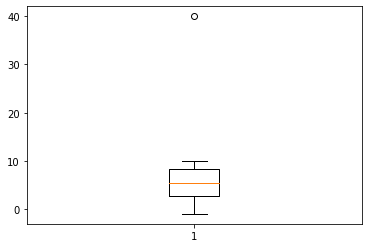

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
arr = [1, 2, 3, 7, 8, 9, 4, 10, 40, 5, 6, -1]
plt.boxplot(arr)
plt.show()

### 去重处理
数据重复不一定会影响数据处理，如在样本分布不均匀时，往往通过复制实例的方式主动生成重复数据供模型使用。这里讨论的去重处理是去除影响正常处理或者无用的重复数据。
重复数据经常是在采集、存储、处理过程中，由于错误逻辑、验证审核机制不完善导致的。重复数据常见的情况有两条数据完全一致，或者两条数据具有同样的“唯一索引”。对于索引号冲突的问题，可以使用覆盖策略，或者在该情况发生时转交人工处理，以免误删数据。对于两条数据完全一致且需要去重的情况，可以使用DataFrame提供的drop_dupliates函数。
本例中，drop_duplicates函数设置了keep='last'，即在遇到重复记录时只保留最后一条；drop_duplicates函数还支持参数subset对指定列去重，如第2行的程序是删除得分重复的记录，用此方法可以实现简单的按年采样功能。

In [7]:
print(data)
print(data.drop_duplicates(keep='last'))
print(data.drop_duplicates(keep='last', subset='score'))

    state  year  score  desc val1
0    Ohio  2000    1.5   NaN    1
1    Ohio  2000    1.5   NaN    1
2    Ohio  2001    1.7   NaN    0
3    Ohio  2002    NaN   NaN    +
4  Nevada  2003    NaN   NaN    0
5  Nevada  3456    8.3   3.0    1
    state  year  score  desc val1
1    Ohio  2000    1.5   NaN    1
2    Ohio  2001    1.7   NaN    0
3    Ohio  2002    NaN   NaN    +
4  Nevada  2003    NaN   NaN    0
5  Nevada  3456    8.3   3.0    1
    state  year  score  desc val1
1    Ohio  2000    1.5   NaN    1
2    Ohio  2001    1.7   NaN    0
4  Nevada  2003    NaN   NaN    0
5  Nevada  3456    8.3   3.0    1


### 数据标准化
数据标准化，又称数据归一化，主要目的是消除不同特征变量量纲级别相差太大造成的不利影响，对于以特征距离为算法基础的机器学习算法（如K近邻算法），数据标准化尤其重要，本节主要介绍min-max标准化和均值归一化两种标准化方法<p>
    min-max标准化又称离差标准化，它利用原始数据的最大值x_max和最小值x_min把原始数据转换到[0,1]区间内， x' = (x - x_min) / (x_max - x_min)<p>
   均值归一化又称Z-score标准化，通过原始数据的均值（mean）和标准差（standard deviation, std）对数据进行标准化，使得规范化后的数据符合标准正态分布    x' = (x - mean)/ std

In [8]:
import pandas as pd
X = pd.DataFrame({'酒精含量（%）': [50, 60, 40, 80, 100], 
                      '苹果酸含量（%）': [2, 1, 1, 3, 2]})
y = [0, 0, 0, 1, 1]

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X_minmax = MinMaxScaler().fit_transform(X)
X_zscore = StandardScaler().fit_transform(X)
print(X_minmax)
print('——————————————————————————')
print(X_zscore)

[[0.16666667 0.5       ]
 [0.33333333 0.        ]
 [0.         0.        ]
 [0.66666667 1.        ]
 [1.         0.5       ]]
——————————————————————————
[[-0.74278135  0.26726124]
 [-0.27854301 -1.06904497]
 [-1.2070197  -1.06904497]
 [ 0.64993368  1.60356745]
 [ 1.57841037  0.26726124]]


## PCA主成分分析
本章将讲解数据降维的常见算法PCA，并通过一个人脸识别模型来巩固所学知识，主要是调用Scikit-learn库的函数来实现。 
### 二维空间降维Python代码实现

In [10]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[1, 1], [2, 2], [3, 3]])
# 数据降维，由二维降至一维

pca = PCA(n_components=1)
pca.fit(X)  # 进行降维模型训练
X_transformed = pca.transform(X)  # 进行数据降维，并赋值给X_transformed

print(X_transformed)  # 查看降维后的结果

[[-1.41421356]
 [ 0.        ]
 [ 1.41421356]]


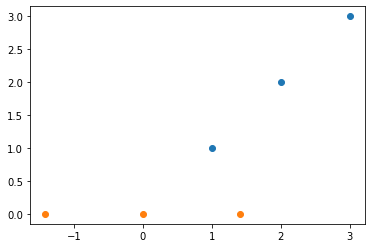

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_transformed,np.zeros(X_transformed.shape))
plt.show()

## 案例实战：人脸识别模型
利用纽约大学公开人脸数据库Olivetti Faces，原图含有40个人的人脸照片，每人10张，拆分为400张jpg图像（课件所带的文件夹中已经预切分好），图像文件名由（人脸编号，下划线分隔符，该图像在该人脸的十张图像中的编号，文件扩展名'jpg'）四部分组成。

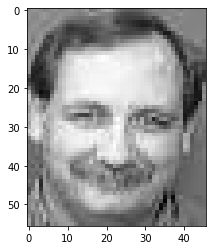

In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline  
#将plt画的图直接显示在cell下方
images_path = r'F:\课程\Python备课\olivettifaces' #这里请改为自己的文件夹位置
names = os.listdir(images_path) #所有的图像文件名，os.listdir函数，指定路径下所有的文件名
img0 = Image.open(os.path.join(images_path, names[0])) # os.path.join将路径组合起来
plt.imshow(img0,cmap=plt.cm.gray)

In [13]:
import numpy as np
img0 = img0.convert('L')
img0 = img0.resize((32,32)) #原图是46 * 56，resize只是为了减小计算量
arr = np.array(img0) #转化为ndarray
arr = arr.reshape(1, -1)#将ndarray拉成一维向量，第二个参数-1的含义是，根据其他度的数量自动计算，原来是32*32=1024个元素，现在第一个维度为1
#所以这里-1处会自动算出为1024


In [14]:
#print(arr.flatten().tolist()) #flatten函数将1*1024的二维数组改为一维向量，tolist函数将其转化为列表，这一步只是看一下包含哪些元素

In [15]:
#构造特征变量X和目标变量y的数据集
X = np.zeros((400,1024), dtype = np.uint8)
y = np.zeros(400, dtype = np.int8)
for i, name in enumerate(names):
    img = Image.open(os.path.join(images_path, name))
    img = img.convert('L')
    img = img.resize((32,32))
    arr = np.array(img).reshape(1,-1)
    X[i] = arr
    y[i] = int(name.split('_')[0])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#将数据集按8：2的比例随机划分成训练集和测试集，指定random_state是为了可重复性

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100) #将特征从1024维降到100维
pca.fit(X_train) #根据训练集获得模型参数
X_train_pca = pca.transform(X_train) #对训练集特征进行PCA降维
X_test_pca = pca.transform(X_test) #对训练集特征进行PCA降维
print(X_train_pca.shape, X_test_pca.shape)

(320, 100) (80, 100)


模型搭建，将训练集和测试集的特征数据降维后，可以使用K近邻算法分类模型进行模型的搭建，K近邻算法分类模型通过训练掌握某张人脸的部分特征数据，在面对测试集的特征数据时可以根据近邻的思想进行人脸的分类

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)
score = accuracy_score(y_pred, y_test)
#score = knn.score(X_test_pca, y_test) 与前一个score等价，前者是通过预测标签y_pred和真实标签y_test来计算准确率，
#后者相当于将测试数据X_test_pca输入到训练好的模型knn中，将预测结果与真实标签比较来计算准确率
print(score)

0.8875


模型对比，比较降维前后数据训练出的模型的准确度

In [23]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train, y_train)
score2 = knn2.score(X_test, y_test)
print(score2)

0.8875
